# Kaggle Customer Churn

[Профиль на Kaggle](https://www.kaggle.com/vyacheslavmanasikhin)

best_score = 0.85345

P.S. Это задание делалось 2 года назад, не обращайте внимания на дату отправки на Kaggle.

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Загрузка данных

In [ ]:
data_train = pd.read_csv('https://raw.githubusercontent.com/houlden/Kaggle_DLS/main/train.csv')
data_test = pd.read_csv('https://raw.githubusercontent.com/houlden/Kaggle_DLS/main/test.csv')

## Анализ данных

Посмотрим на шаблон нашей выборки и выведем основую информацию о DataFrame-е:

In [ ]:
data_train.sample(5)

ClientPeriod  MonthlySpending TotalSpent     Sex  IsSeniorCitizen  \
5191            50            20.55    1070.25  Female                0   
3548            53           100.30     5200.8  Female                0   
2648             9            39.55        373    Male                0   
4405            58            89.85    5125.75    Male                1   
874             10            70.10     659.65    Male                0   

     HasPartner HasChild HasPhoneService HasMultiplePhoneNumbers  \
5191        Yes      Yes             Yes                      No   
3548         No       No             Yes                      No   
2648         No       No              No        No phone service   
4405        Yes      Yes             Yes                     Yes   
874         Yes       No             Yes                      No   

     HasInternetService HasOnlineSecurityService      HasOnlineBackup  \
5191                 No      No internet service  No internet service   
3548        Fiber optic                       No                  Yes   
2648                DSL                      Yes                  Yes   
4405        Fiber optic                      Yes                  Yes   
874         Fiber optic                       No                   No   

      HasDeviceProtection HasTechSupportAccess          HasOnlineTV  \
5191  No internet service  No internet service  No internet service   
3548                  Yes                   No                  Yes   
2648                  Yes                   No                   No   
4405                   No                  Yes                   No   
874                    No                   No                   No   

     HasMovieSubscription HasContractPhone IsBillingPaperless  \
5191  No internet service         Two year                 No   
3548                  Yes         One year                Yes   
2648                   No         One year                 No   
4405                   No         One year                Yes   
874                    No   Month-to-month                Yes   

                  PaymentMethod  Churn  
5191    Credit card (automatic)      0  
3548               Mailed check      0  
2648               Mailed check      0  
4405  Bank transfer (automatic)      0  
874            Electronic check      1

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [ ]:
data_test.sample(5)

ClientPeriod  MonthlySpending TotalSpent     Sex  IsSeniorCitizen  \
528            18            84.95    1443.65  Female                1   
432             1            46.00         46  Female                1   
964            14            90.90       1259  Female                0   
666             1            74.70       74.7    Male                1   
658            72           113.65    8182.75  Female                0   

    HasPartner HasChild HasPhoneService HasMultiplePhoneNumbers  \
528         No       No             Yes                      No   
432        Yes       No             Yes                      No   
964        Yes      Yes             Yes                     Yes   
666         No       No             Yes                     Yes   
658        Yes       No             Yes                     Yes   

    HasInternetService HasOnlineSecurityService HasOnlineBackup  \
528        Fiber optic                       No              No   
432                DSL                       No              No   
964        Fiber optic                       No             Yes   
666        Fiber optic                       No              No   
658        Fiber optic                      Yes             Yes   

    HasDeviceProtection HasTechSupportAccess HasOnlineTV HasMovieSubscription  \
528                 Yes                   No          No                  Yes   
432                  No                   No          No                   No   
964                  No                   No          No                  Yes   
666                  No                   No          No                   No   
658                 Yes                  Yes         Yes                  Yes   

    HasContractPhone IsBillingPaperless              PaymentMethod  
528   Month-to-month                Yes           Electronic check  
432   Month-to-month                 No           Electronic check  
964   Month-to-month                Yes  Bank transfer (automatic)  
666   Month-to-month                Yes           Electronic check  
658         Two year                Yes  Bank transfer (automatic)

In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              1761 non-null   int64  
 1   MonthlySpending           1761 non-null   float64
 2   TotalSpent                1761 non-null   object 
 3   Sex                       1761 non-null   object 
 4   IsSeniorCitizen           1761 non-null   int64  
 5   HasPartner                1761 non-null   object 
 6   HasChild                  1761 non-null   object 
 7   HasPhoneService           1761 non-null   object 
 8   HasMultiplePhoneNumbers   1761 non-null   object 
 9   HasInternetService        1761 non-null   object 
 10  HasOnlineSecurityService  1761 non-null   object 
 11  HasOnlineBackup           1761 non-null   object 
 12  HasDeviceProtection       1761 non-null   object 
 13  HasTechSupportAccess      1761 non-null   object 
 14  HasOnlin

Можно заметить, что столбец TotalSpent имеет строковый тип (object), заменим его на float. Неприводимые типы заменим на NaN.

In [ ]:
data_train.TotalSpent = pd.to_numeric(data_train.TotalSpent, downcast = 'float', errors='coerce')
data_test.TotalSpent = pd.to_numeric(data_test.TotalSpent, downcast = 'float', errors='coerce')

Таблицы с количеством NaN-ов в train и test:

In [ ]:
nans_train = data_train.isna().sum()
nans_table_train = pd.DataFrame(data=nans_train.array, index=nans_train.index, columns=['Number of NaN value in train-set'])
nans_table_train

Number of NaN value in train-set
ClientPeriod                                             0
MonthlySpending                                          0
TotalSpent                                               9
Sex                                                      0
IsSeniorCitizen                                          0
HasPartner                                               0
HasChild                                                 0
HasPhoneService                                          0
HasMultiplePhoneNumbers                                  0
HasInternetService                                       0
HasOnlineSecurityService                                 0
HasOnlineBackup                                          0
HasDeviceProtection                                      0
HasTechSupportAccess                                     0
HasOnlineTV                                              0
HasMovieSubscription                                     0
HasContractPhone                                         0
IsBillingPaperless                                       0
PaymentMethod                                            0
Churn                                                    0

In [ ]:
nans_test = data_test.isna().sum()
nans_table_test = pd.DataFrame(data=nans_test.array, index=nans_test.index, columns=['Number of NaN value in test-set'])
nans_table_test

Number of NaN value in test-set
ClientPeriod                                            0
MonthlySpending                                         0
TotalSpent                                              2
Sex                                                     0
IsSeniorCitizen                                         0
HasPartner                                              0
HasChild                                                0
HasPhoneService                                         0
HasMultiplePhoneNumbers                                 0
HasInternetService                                      0
HasOnlineSecurityService                                0
HasOnlineBackup                                         0
HasDeviceProtection                                     0
HasTechSupportAccess                                    0
HasOnlineTV                                             0
HasMovieSubscription                                    0
HasContractPhone                                        0
IsBillingPaperless                                      0
PaymentMethod                                           0

Посмотрим на строки, содержащие NaN-ы:

In [ ]:
data_train[data_train.TotalSpent.isna()]

ClientPeriod  MonthlySpending  TotalSpent     Sex  IsSeniorCitizen  \
1048             0            25.75         NaN    Male                0   
1707             0            73.35         NaN  Female                0   
2543             0            19.70         NaN    Male                0   
3078             0            80.85         NaN  Female                0   
3697             0            20.00         NaN  Female                0   
4002             0            61.90         NaN    Male                0   
4326             0            25.35         NaN    Male                0   
4551             0            52.55         NaN  Female                0   
4598             0            56.05         NaN  Female                0   

     HasPartner HasChild HasPhoneService HasMultiplePhoneNumbers  \
1048        Yes      Yes             Yes                     Yes   
1707        Yes      Yes             Yes                     Yes   
2543        Yes      Yes             Yes                      No   
3078        Yes      Yes             Yes                      No   
3697        Yes      Yes             Yes                      No   
4002         No      Yes             Yes                     Yes   
4326        Yes      Yes             Yes                     Yes   
4551        Yes      Yes              No        No phone service   
4598        Yes      Yes              No        No phone service   

     HasInternetService HasOnlineSecurityService      HasOnlineBackup  \
1048                 No      No internet service  No internet service   
1707                DSL                       No                  Yes   
2543                 No      No internet service  No internet service   
3078                DSL                      Yes                  Yes   
3697                 No      No internet service  No internet service   
4002                DSL                      Yes                  Yes   
4326                 No      No internet service  No internet service   
4551                DSL                      Yes                   No   
4598                DSL                      Yes                  Yes   

      HasDeviceProtection HasTechSupportAccess          HasOnlineTV  \
1048  No internet service  No internet service  No internet service   
1707                  Yes                  Yes                  Yes   
2543  No internet service  No internet service  No internet service   
3078                  Yes                   No                  Yes   
3697  No internet service  No internet service  No internet service   
4002                   No                  Yes                   No   
4326  No internet service  No internet service  No internet service   
4551                  Yes                  Yes                  Yes   
4598                  Yes                  Yes                  Yes   

     HasMovieSubscription HasContractPhone IsBillingPaperless  \
1048  No internet service         Two year                 No   
1707                   No         Two year                 No   
2543  No internet service         One year                Yes   
3078                  Yes         Two year                 No   
3697  No internet service         Two year                 No   
4002                   No         Two year                Yes   
4326  No internet service         Two year                 No   
4551                   No         Two year                Yes   
4598                   No         Two year                 No   

                  PaymentMethod  Churn  
1048               Mailed check      0  
1707               Mailed check      0  
2543               Mailed check      0  
3078               Mailed check      0  
3697               Mailed check      0  
4002  Bank transfer (automatic)      0  
4326               Mailed check      0  
4551  Bank transfer (automatic)      0  
4598    Credit card (automatic)      0

In [ ]:
data_test[data_test.TotalSpent.isna()]

ClientPeriod  MonthlySpending  TotalSpent   Sex  IsSeniorCitizen  \
177             0            19.85         NaN  Male                0   
767             0            20.25         NaN  Male                0   

    HasPartner HasChild HasPhoneService HasMultiplePhoneNumbers  \
177        Yes      Yes             Yes                      No   
767         No      Yes             Yes                      No   

    HasInternetService HasOnlineSecurityService      HasOnlineBackup  \
177                 No      No internet service  No internet service   
767                 No      No internet service  No internet service   

     HasDeviceProtection HasTechSupportAccess          HasOnlineTV  \
177  No internet service  No internet service  No internet service   
767  No internet service  No internet service  No internet service   

    HasMovieSubscription HasContractPhone IsBillingPaperless PaymentMethod  
177  No internet service         Two year                 No  Mailed check  
767  No internet service         Two year                 No  Mailed check

In [ ]:
idx_TotalSpent_NaN_train = data_train.index[data_train.TotalSpent.isna()].tolist()
idx_TotalSpent_NaN_train

[1048, 1707, 2543, 3078, 3697, 4002, 4326, 4551, 4598]

In [ ]:
idx_TotalSpent_NaN_test = data_test.index[data_test.TotalSpent.isna()].tolist()
idx_TotalSpent_NaN_test

[177, 767]

Вероятно, это новые клиенты (ClientPeriod = 0), присоединившиеся менее месяца назад, а в TotalSpent данные добавляются в конце отчетного периода. Посмотрим, имеют ли какие-то ещё строки ClientPeriod = 0:

In [ ]:
data_train[data_train.ClientPeriod == 0]

ClientPeriod  MonthlySpending  TotalSpent     Sex  IsSeniorCitizen  \
1048             0            25.75         NaN    Male                0   
1707             0            73.35         NaN  Female                0   
2543             0            19.70         NaN    Male                0   
3078             0            80.85         NaN  Female                0   
3697             0            20.00         NaN  Female                0   
4002             0            61.90         NaN    Male                0   
4326             0            25.35         NaN    Male                0   
4551             0            52.55         NaN  Female                0   
4598             0            56.05         NaN  Female                0   

     HasPartner HasChild HasPhoneService HasMultiplePhoneNumbers  \
1048        Yes      Yes             Yes                     Yes   
1707        Yes      Yes             Yes                     Yes   
2543        Yes      Yes             Yes                      No   
3078        Yes      Yes             Yes                      No   
3697        Yes      Yes             Yes                      No   
4002         No      Yes             Yes                     Yes   
4326        Yes      Yes             Yes                     Yes   
4551        Yes      Yes              No        No phone service   
4598        Yes      Yes              No        No phone service   

     HasInternetService HasOnlineSecurityService      HasOnlineBackup  \
1048                 No      No internet service  No internet service   
1707                DSL                       No                  Yes   
2543                 No      No internet service  No internet service   
3078                DSL                      Yes                  Yes   
3697                 No      No internet service  No internet service   
4002                DSL                      Yes                  Yes   
4326                 No      No internet service  No internet service   
4551                DSL                      Yes                   No   
4598                DSL                      Yes                  Yes   

      HasDeviceProtection HasTechSupportAccess          HasOnlineTV  \
1048  No internet service  No internet service  No internet service   
1707                  Yes                  Yes                  Yes   
2543  No internet service  No internet service  No internet service   
3078                  Yes                   No                  Yes   
3697  No internet service  No internet service  No internet service   
4002                   No                  Yes                   No   
4326  No internet service  No internet service  No internet service   
4551                  Yes                  Yes                  Yes   
4598                  Yes                  Yes                  Yes   

     HasMovieSubscription HasContractPhone IsBillingPaperless  \
1048  No internet service         Two year                 No   
1707                   No         Two year                 No   
2543  No internet service         One year                Yes   
3078                  Yes         Two year                 No   
3697  No internet service         Two year                 No   
4002                   No         Two year                Yes   
4326  No internet service         Two year                 No   
4551                   No         Two year                Yes   
4598                   No         Two year                 No   

                  PaymentMethod  Churn  
1048               Mailed check      0  
1707               Mailed check      0  
2543               Mailed check      0  
3078               Mailed check      0  
3697               Mailed check      0  
4002  Bank transfer (automatic)      0  
4326               Mailed check      0  
4551  Bank transfer (automatic)      0  
4598    Credit card (automatic)      0

In [ ]:
data_test[data_test.ClientPeriod == 0]

ClientPeriod  MonthlySpending  TotalSpent   Sex  IsSeniorCitizen  \
177             0            19.85         NaN  Male                0   
767             0            20.25         NaN  Male                0   

    HasPartner HasChild HasPhoneService HasMultiplePhoneNumbers  \
177        Yes      Yes             Yes                      No   
767         No      Yes             Yes                      No   

    HasInternetService HasOnlineSecurityService      HasOnlineBackup  \
177                 No      No internet service  No internet service   
767                 No      No internet service  No internet service   

     HasDeviceProtection HasTechSupportAccess          HasOnlineTV  \
177  No internet service  No internet service  No internet service   
767  No internet service  No internet service  No internet service   

    HasMovieSubscription HasContractPhone IsBillingPaperless PaymentMethod  
177  No internet service         Two year                 No  Mailed check  
767  No internet service         Two year                 No  Mailed check

Можно увидеть, что это всё те же строки с пропущенным TotalSpent, похоже, мы были правы. Поскольку таких строк немного, напрашиваются два пути: 1 - выбросить эти строки из train, чтобы они не повлияли на обучение, а в test заменить NaN каким-нибудь значением, поскольку для test нам в любом случае нужно дать предсказание; 2 - обработать train и test одинаково с заменой NaN-ов на какие-то адекватные значения. Пойдем вторым путём, поскольку, судя по всему, NaN разумно заменить нулями, ведь расчетный месяц ещё не окончен. Замена на MonthlySpending выглядит менее правильной, потому что тогда получится, что для этих строк мы учитывает траты текущего месяца, а для всех остальных - нет.

In [ ]:
data_train.TotalSpent[data_train.TotalSpent.isna()] = 0
data_test.TotalSpent[data_test.TotalSpent.isna()] = 0

Убедимся, что заменена значений в train и test выполнена корректно и проверим тип колонки TotalSpent:

In [ ]:
data_train.iloc[idx_TotalSpent_NaN_train]

ClientPeriod  MonthlySpending  TotalSpent     Sex  IsSeniorCitizen  \
1048             0            25.75         0.0    Male                0   
1707             0            73.35         0.0  Female                0   
2543             0            19.70         0.0    Male                0   
3078             0            80.85         0.0  Female                0   
3697             0            20.00         0.0  Female                0   
4002             0            61.90         0.0    Male                0   
4326             0            25.35         0.0    Male                0   
4551             0            52.55         0.0  Female                0   
4598             0            56.05         0.0  Female                0   

     HasPartner HasChild HasPhoneService HasMultiplePhoneNumbers  \
1048        Yes      Yes             Yes                     Yes   
1707        Yes      Yes             Yes                     Yes   
2543        Yes      Yes             Yes                      No   
3078        Yes      Yes             Yes                      No   
3697        Yes      Yes             Yes                      No   
4002         No      Yes             Yes                     Yes   
4326        Yes      Yes             Yes                     Yes   
4551        Yes      Yes              No        No phone service   
4598        Yes      Yes              No        No phone service   

     HasInternetService HasOnlineSecurityService      HasOnlineBackup  \
1048                 No      No internet service  No internet service   
1707                DSL                       No                  Yes   
2543                 No      No internet service  No internet service   
3078                DSL                      Yes                  Yes   
3697                 No      No internet service  No internet service   
4002                DSL                      Yes                  Yes   
4326                 No      No internet service  No internet service   
4551                DSL                      Yes                   No   
4598                DSL                      Yes                  Yes   

      HasDeviceProtection HasTechSupportAccess          HasOnlineTV  \
1048  No internet service  No internet service  No internet service   
1707                  Yes                  Yes                  Yes   
2543  No internet service  No internet service  No internet service   
3078                  Yes                   No                  Yes   
3697  No internet service  No internet service  No internet service   
4002                   No                  Yes                   No   
4326  No internet service  No internet service  No internet service   
4551                  Yes                  Yes                  Yes   
4598                  Yes                  Yes                  Yes   

     HasMovieSubscription HasContractPhone IsBillingPaperless  \
1048  No internet service         Two year                 No   
1707                   No         Two year                 No   
2543  No internet service         One year                Yes   
3078                  Yes         Two year                 No   
3697  No internet service         Two year                 No   
4002                   No         Two year                Yes   
4326  No internet service         Two year                 No   
4551                   No         Two year                Yes   
4598                   No         Two year                 No   

                  PaymentMethod  Churn  
1048               Mailed check      0  
1707               Mailed check      0  
2543               Mailed check      0  
3078               Mailed check      0  
3697               Mailed check      0  
4002  Bank transfer (automatic)      0  
4326               Mailed check      0  
4551  Bank transfer (automatic)      0  
4598    Credit card (automatic)      0

In [ ]:
data_test.iloc[idx_TotalSpent_NaN_test]

ClientPeriod  MonthlySpending  TotalSpent   Sex  IsSeniorCitizen  \
177             0            19.85         0.0  Male                0   
767             0            20.25         0.0  Male                0   

    HasPartner HasChild HasPhoneService HasMultiplePhoneNumbers  \
177        Yes      Yes             Yes                      No   
767         No      Yes             Yes                      No   

    HasInternetService HasOnlineSecurityService      HasOnlineBackup  \
177                 No      No internet service  No internet service   
767                 No      No internet service  No internet service   

     HasDeviceProtection HasTechSupportAccess          HasOnlineTV  \
177  No internet service  No internet service  No internet service   
767  No internet service  No internet service  No internet service   

    HasMovieSubscription HasContractPhone IsBillingPaperless PaymentMethod  
177  No internet service         Two year                 No  Mailed check  
767  No internet service         Two year                 No  Mailed check

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   float32
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              1761 non-null   int64  
 1   MonthlySpending           1761 non-null   float64
 2   TotalSpent                1761 non-null   float32
 3   Sex                       1761 non-null   object 
 4   IsSeniorCitizen           1761 non-null   int64  
 5   HasPartner                1761 non-null   object 
 6   HasChild                  1761 non-null   object 
 7   HasPhoneService           1761 non-null   object 
 8   HasMultiplePhoneNumbers   1761 non-null   object 
 9   HasInternetService        1761 non-null   object 
 10  HasOnlineSecurityService  1761 non-null   object 
 11  HasOnlineBackup           1761 non-null   object 
 12  HasDeviceProtection       1761 non-null   object 
 13  HasTechSupportAccess      1761 non-null   object 
 14  HasOnlin

Посмотрим, сколько строк встречаются в train и test более одного раза:

In [ ]:
freq_train = data_train.groupby(data_train.columns.tolist(), as_index=False).size()
repetitions_train = freq_train[freq_train['size'] > 1]
repetitions_train.shape

(14, 21)

In [ ]:
repetitions_train.head(repetitions_train.shape[0])

ClientPeriod  MonthlySpending  TotalSpent     Sex  IsSeniorCitizen  \
37              1            19.65   19.650000  Female                0   
70              1            20.05   20.049999    Male                0   
82              1            20.20   20.200001    Male                0   
84              1            20.20   20.200001    Male                0   
98              1            20.45   20.450001    Male                0   
112             1            20.90   20.900000  Female                0   
202             1            45.30   45.299999    Male                0   
211             1            45.70   45.700001    Male                0   
286             1            69.20   69.199997  Female                0   
288             1            69.35   69.349998    Male                0   
296             1            69.60   69.599998  Female                1   
307             1            69.90   69.900002    Male                0   
315             1            70.10   70.099998  Female                0   
316             1            70.15   70.150002  Female                0   

    HasPartner HasChild HasPhoneService HasMultiplePhoneNumbers  \
37          No       No             Yes                      No   
70          No       No             Yes                      No   
82          No       No             Yes                      No   
84          No       No             Yes                      No   
98          No       No             Yes                      No   
112         No       No             Yes                      No   
202         No       No             Yes                      No   
211         No       No             Yes                      No   
286         No       No             Yes                      No   
288         No       No             Yes                      No   
296         No       No             Yes                      No   
307         No       No             Yes                      No   
315         No       No             Yes                      No   
316         No       No             Yes                      No   

    HasInternetService  ...      HasOnlineBackup  HasDeviceProtection  \
37                  No  ...  No internet service  No internet service   
70                  No  ...  No internet service  No internet service   
82                  No  ...  No internet service  No internet service   
84                  No  ...  No internet service  No internet service   
98                  No  ...  No internet service  No internet service   
112                 No  ...  No internet service  No internet service   
202                DSL  ...                   No                   No   
211                DSL  ...                   No                   No   
286        Fiber optic  ...                   No                   No   
288        Fiber optic  ...                   No                   No   
296        Fiber optic  ...                   No                   No   
307        Fiber optic  ...                   No                   No   
315        Fiber optic  ...                   No                   No   
316        Fiber optic  ...                   No                   No   

    HasTechSupportAccess          HasOnlineTV HasMovieSubscription  \
37   No internet service  No internet service  No internet service   
70   No internet service  No internet service  No internet service   
82   No internet service  No internet service  No internet service   
84   No internet service  No internet service  No internet service   
98   No internet service  No internet service  No internet service   
112  No internet service  No internet service  No internet service   
202                   No                   No                   No   
211                   No                   No                   No   
286                   No                   No                   No   
288                   No                   No                   No   
296    

In [ ]:
freq_test = data_test.groupby(data_test.columns.tolist(), as_index=False).size()
repetitions_test = freq_test[freq_test['size'] > 1]
repetitions_test.shape

(3, 20)

In [ ]:
repetitions_test.head(repetitions_test.shape[0])

ClientPeriod  MonthlySpending  TotalSpent     Sex  IsSeniorCitizen  \
11             1             19.5        19.5  Female                0   
22             1             19.9        19.9  Female                0   
41             1             20.6        20.6    Male                0   

   HasPartner HasChild HasPhoneService HasMultiplePhoneNumbers  \
11         No       No             Yes                      No   
22         No       No             Yes                      No   
41         No       No             Yes                      No   

   HasInternetService HasOnlineSecurityService      HasOnlineBackup  \
11                 No      No internet service  No internet service   
22                 No      No internet service  No internet service   
41                 No      No internet service  No internet service   

    HasDeviceProtection HasTechSupportAccess          HasOnlineTV  \
11  No internet service  No internet service  No internet service   
22  No internet service  No internet service  No internet service   
41  No internet service  No internet service  No internet service   

   HasMovieSubscription HasContractPhone IsBillingPaperless PaymentMethod  \
11  No internet service   Month-to-month                 No  Mailed check   
22  No internet service   Month-to-month                 No  Mailed check   
41  No internet service   Month-to-month                 No  Mailed check   

    size  
11     2  
22     2  
41     2

Повторяющихся строк в train немного (14), и повторяются они всего по 2 раза, поэтому можно оставить их как есть. Если бы таких строк было много и с различным числом повторений, то можно было бы задуматься о введении еще одного признака - количество повторов. В test строк также немного.

Разделим колонки с континуальными и категориальными признаками, выделим параметры и целевую переменную:

In [ ]:
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

Посмотрим, сколько уникальных значений имеют столбцы с категориальными признаками и сколько раз встречается каждое значение:

In [ ]:
# data_train.nunique()[[*cat_cols, target_col]]

In [ ]:
# data_test.nunique()[cat_cols]

In [ ]:
def table_cat_constructor(data, cat_cols):
    '''
    Возвращает объект pd.DataFrame, который содержит столбцы данных:
    [имя исходного категориального столбца, количество уникальных значений,
    количество включений для каждого значения]

    data: pd.DataFrame object
    cat_cols: list of categorical column names
    '''

    table_cat = list()

    for col in cat_cols:
        names = data[col].value_counts().index.tolist()
        nums = data[col].value_counts().tolist()
        names_nums = [str(names[i]) + ': ' + str(nums[i]) for i in range(len(names))]
        names_nums_string = '; '.join(names_nums)

        table_cat.append([col, data[col].nunique(), names_nums_string])

    return pd.DataFrame(table_cat, columns=['cat_column', 'num_unique', 'cat_count'])

In [ ]:
table_cat_train = table_cat_constructor(data_train, cat_cols)
table_cat_test = table_cat_constructor(data_test, cat_cols)

In [ ]:
table_cat_train

cat_column  num_unique  \
0                        Sex           2   
1            IsSeniorCitizen           2   
2                 HasPartner           2   
3                   HasChild           2   
4            HasPhoneService           2   
5    HasMultiplePhoneNumbers           3   
6         HasInternetService           3   
7   HasOnlineSecurityService           3   
8            HasOnlineBackup           3   
9        HasDeviceProtection           3   
10      HasTechSupportAccess           3   
11               HasOnlineTV           3   
12      HasMovieSubscription           3   
13          HasContractPhone           3   
14        IsBillingPaperless           2   
15             PaymentMethod           4   

                                            cat_count  
0                            Male: 2655; Female: 2627  
1                                     0: 4440; 1: 842  
2                                 No: 2705; Yes: 2577  
3                                 No: 3676; Yes: 1606  
4                                  Yes: 4761; No: 521  
5          No: 2511; Yes: 2250; No phone service: 521  
6              Fiber optic: 2341; DSL: 1800; No: 1141  
7      No: 2612; Yes: 1529; No internet service: 1141  
8      No: 2332; Yes: 1809; No internet service: 1141  
9      No: 2317; Yes: 1824; No internet service: 1141  
10     No: 2604; Yes: 1537; No internet service: 1141  
11     No: 2099; Yes: 2042; No internet service: 1141  
12     No: 2081; Yes: 2060; No internet service: 1141  
13  Month-to-month: 2920; Two year: 1280; One year...  
14                                Yes: 3148; No: 2134  
15  Electronic check: 1786; Mailed check: 1194; Ba...

In [ ]:
table_cat_test

cat_column  num_unique  \
0                        Sex           2   
1            IsSeniorCitizen           2   
2                 HasPartner           2   
3                   HasChild           2   
4            HasPhoneService           2   
5    HasMultiplePhoneNumbers           3   
6         HasInternetService           3   
7   HasOnlineSecurityService           3   
8            HasOnlineBackup           3   
9        HasDeviceProtection           3   
10      HasTechSupportAccess           3   
11               HasOnlineTV           3   
12      HasMovieSubscription           3   
13          HasContractPhone           3   
14        IsBillingPaperless           2   
15             PaymentMethod           4   

                                            cat_count  
0                              Male: 900; Female: 861  
1                                     0: 1461; 1: 300  
2                                   No: 936; Yes: 825  
3                                  No: 1257; Yes: 504  
4                                  Yes: 1600; No: 161  
5            No: 879; Yes: 721; No phone service: 161  
6                 Fiber optic: 755; DSL: 621; No: 385  
7         No: 886; Yes: 490; No internet service: 385  
8         No: 756; Yes: 620; No internet service: 385  
9         No: 778; Yes: 598; No internet service: 385  
10        No: 869; Yes: 507; No internet service: 385  
11        No: 711; Yes: 665; No internet service: 385  
12        No: 704; Yes: 672; No internet service: 385  
13  Month-to-month: 955; Two year: 415; One year: 391  
14                                 Yes: 1023; No: 738  
15  Electronic check: 579; Mailed check: 418; Bank...

Построим гистограммы для численных признаков и круговые диаграммы для категориальных признаков (train):

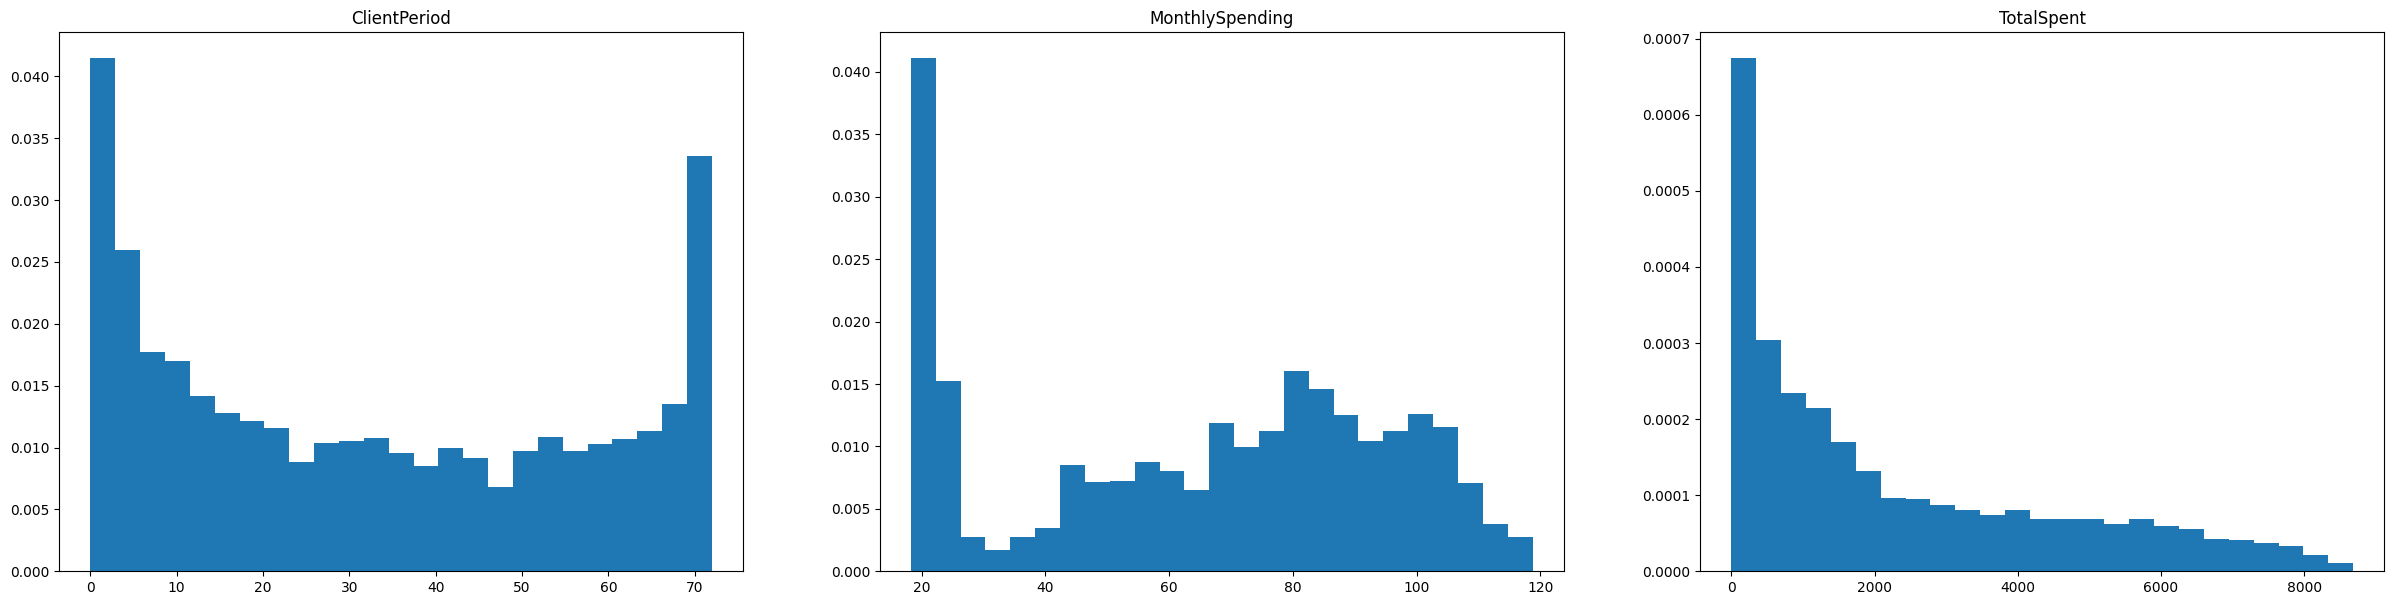

In [ ]:
plt.figure(figsize=(30, 7))
for i in range(1, len(num_cols) + 1):
    plt.subplot(1, 3, i)
    # plt.hist(np.log(data_train[num_cols[i - 1]]), range=(np.log(data_train[num_cols[i - 1]]).min(), np.log(data_train[num_cols[i - 1]]).max()), bins=20, density=True)
    plt.hist(data_train[num_cols[i - 1]], range=(data_train[num_cols[i - 1]].min(), data_train[num_cols[i - 1]].max()), bins=25, density=True)
    plt.title(label=num_cols[i - 1])
plt.show()

На всех распределения есть явный пик в начале. Распределение ClientPeriod похоже на равномерное с пиками на краях. TotalSpent имеет экспоненциальную форму. MonthlySpending выглядит как смесь трёх кластеров (клиенты с минимальным пакетом услуг - в окрестности 20; клиенты со средним пакетом - в окрестности 55; клиенты с расширенным пакетом услуг (высокой ежемесячной платой) - в окрестности 85).

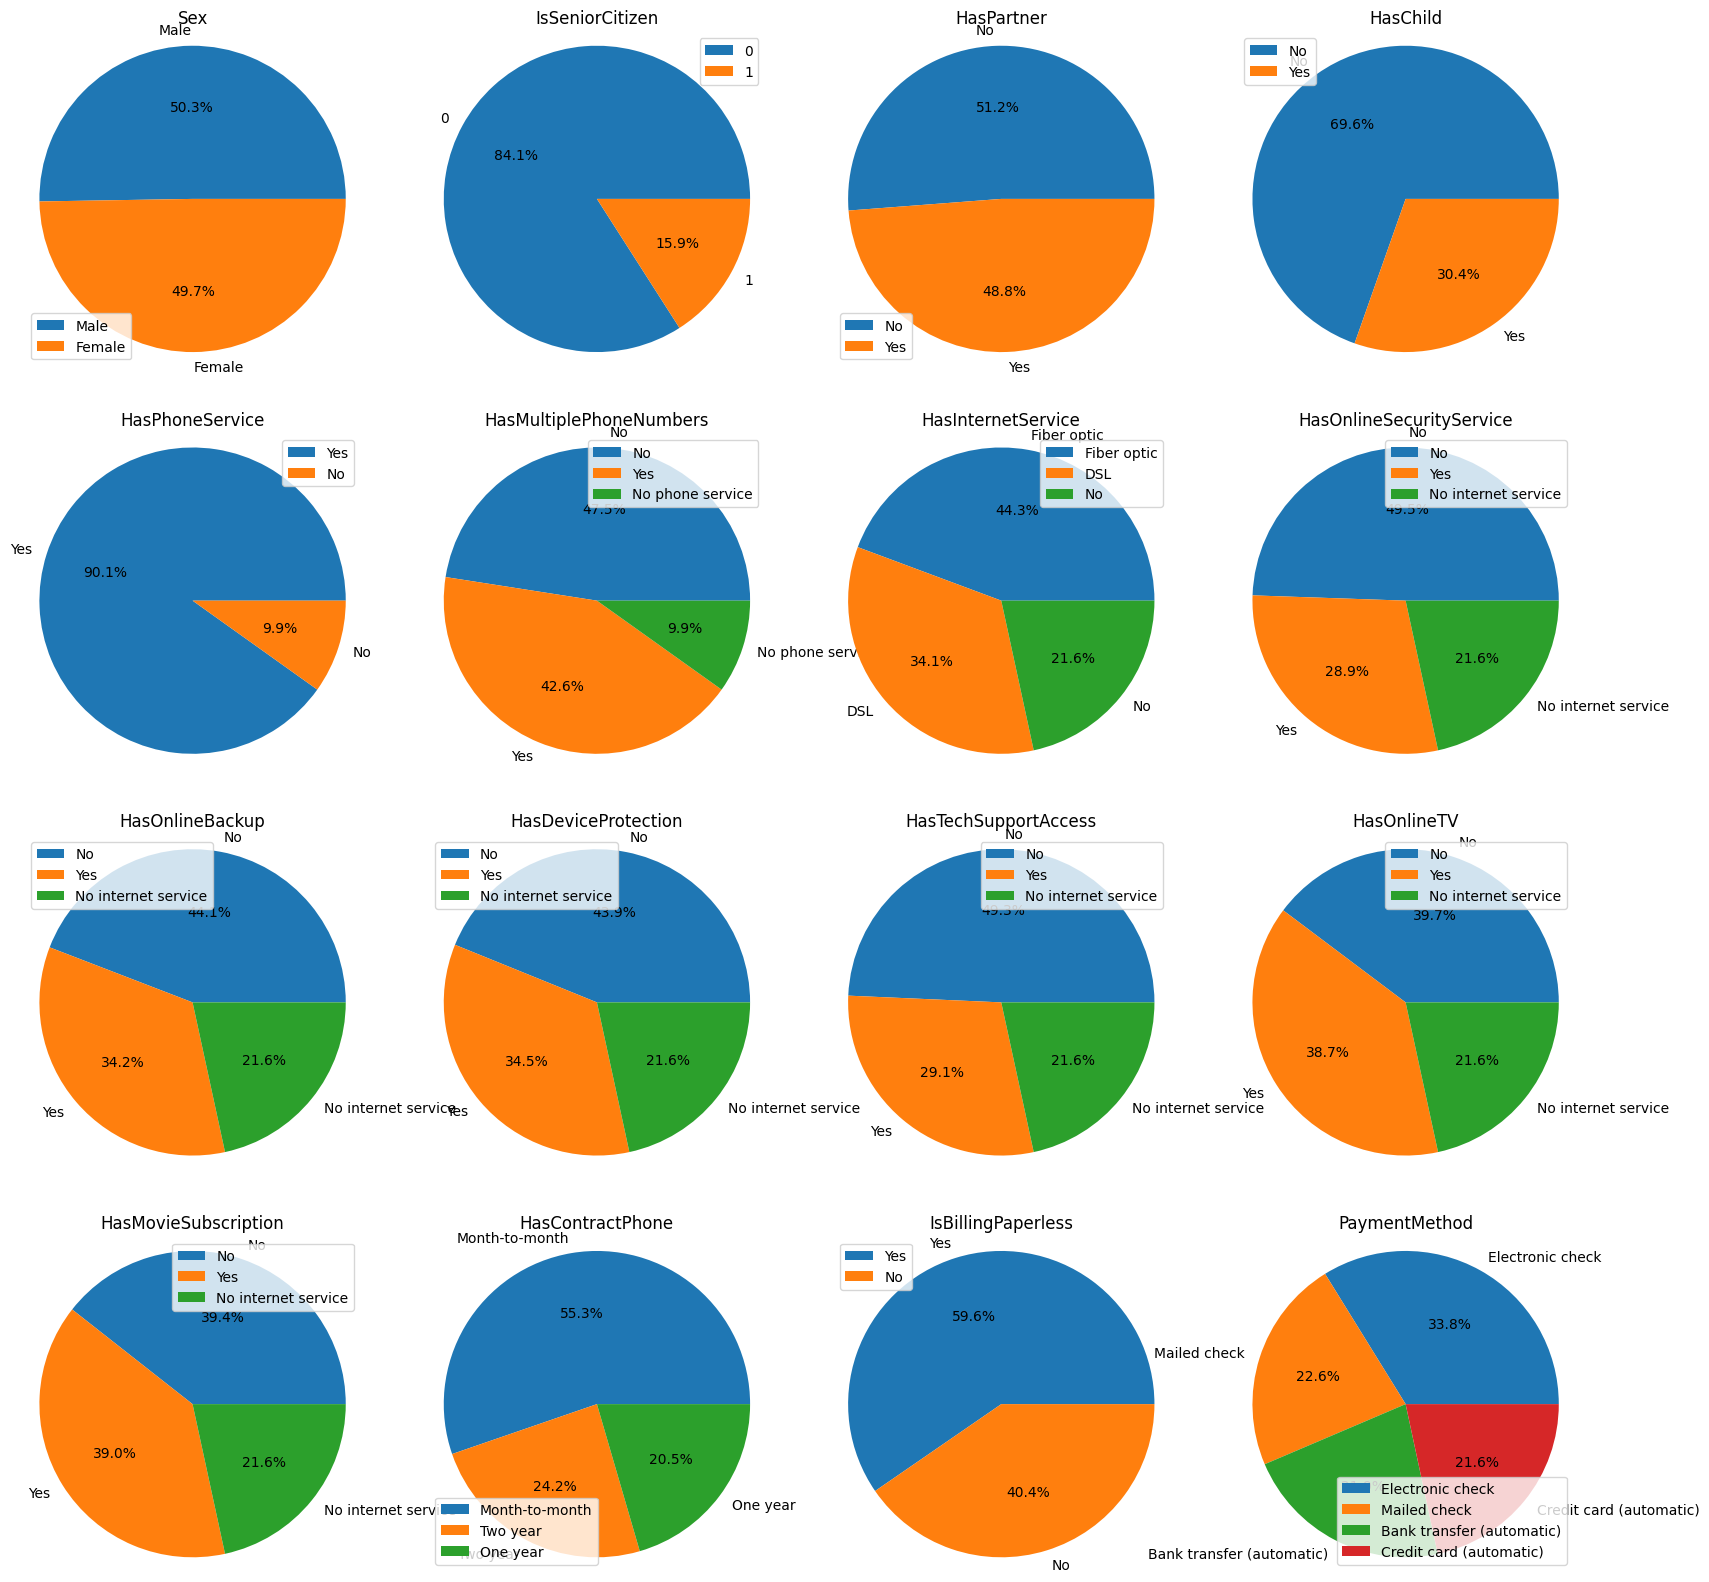

In [ ]:
plt.figure(figsize=(20, 20))
for i in range(1, len(cat_cols) + 1):
    plt.subplot(4, 4, i)
    plt.pie(data_train[cat_cols[i - 1]].value_counts(), labels=data_train[cat_cols[i - 1]].value_counts().index.tolist(), autopct='%1.1f%%')
    plt.axis('equal')
    plt.title(cat_cols[i - 1])
    plt.legend()
plt.show()

Посмотрим распределение целевой переменной:

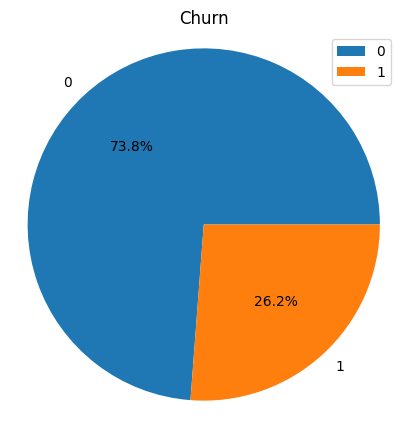

In [ ]:
plt.figure(figsize=(5, 5))
plt.pie(data_train[target_col].value_counts(), labels=data_train[target_col].value_counts().index.tolist(), autopct='%1.1f%%')
plt.axis('equal')
plt.title(target_col)
plt.legend()
plt.show()

Распределение целевой переменной несбалансированное, целесообразно использовать метрику, устойчивую к дисбалансу выборки. В нашем случае - ROC-AUC.

Построим гистограммы и круговые диаграммы для признаков test:

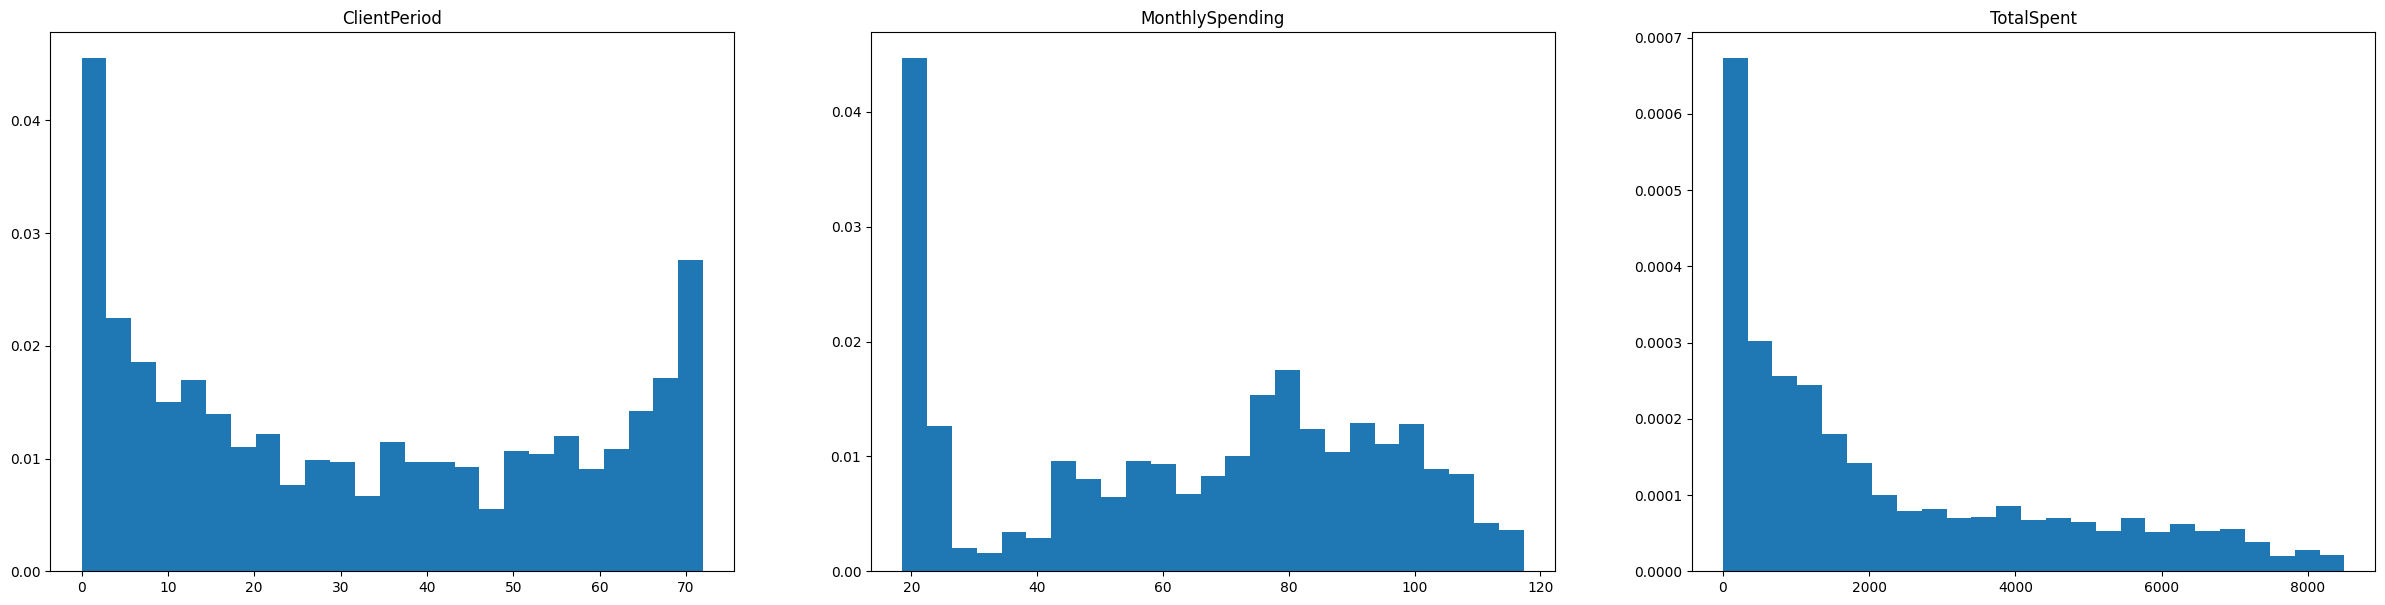

In [ ]:
plt.figure(figsize=(30, 7))
for i in range(1, len(num_cols) + 1):
    plt.subplot(1, 3, i)
    plt.hist(data_test[num_cols[i - 1]], range=(data_test[num_cols[i - 1]].min(), data_test[num_cols[i - 1]].max()), bins=25, density=True)
    plt.title(label=num_cols[i - 1])
plt.show()

Тенденция по распределениям сохраняется.

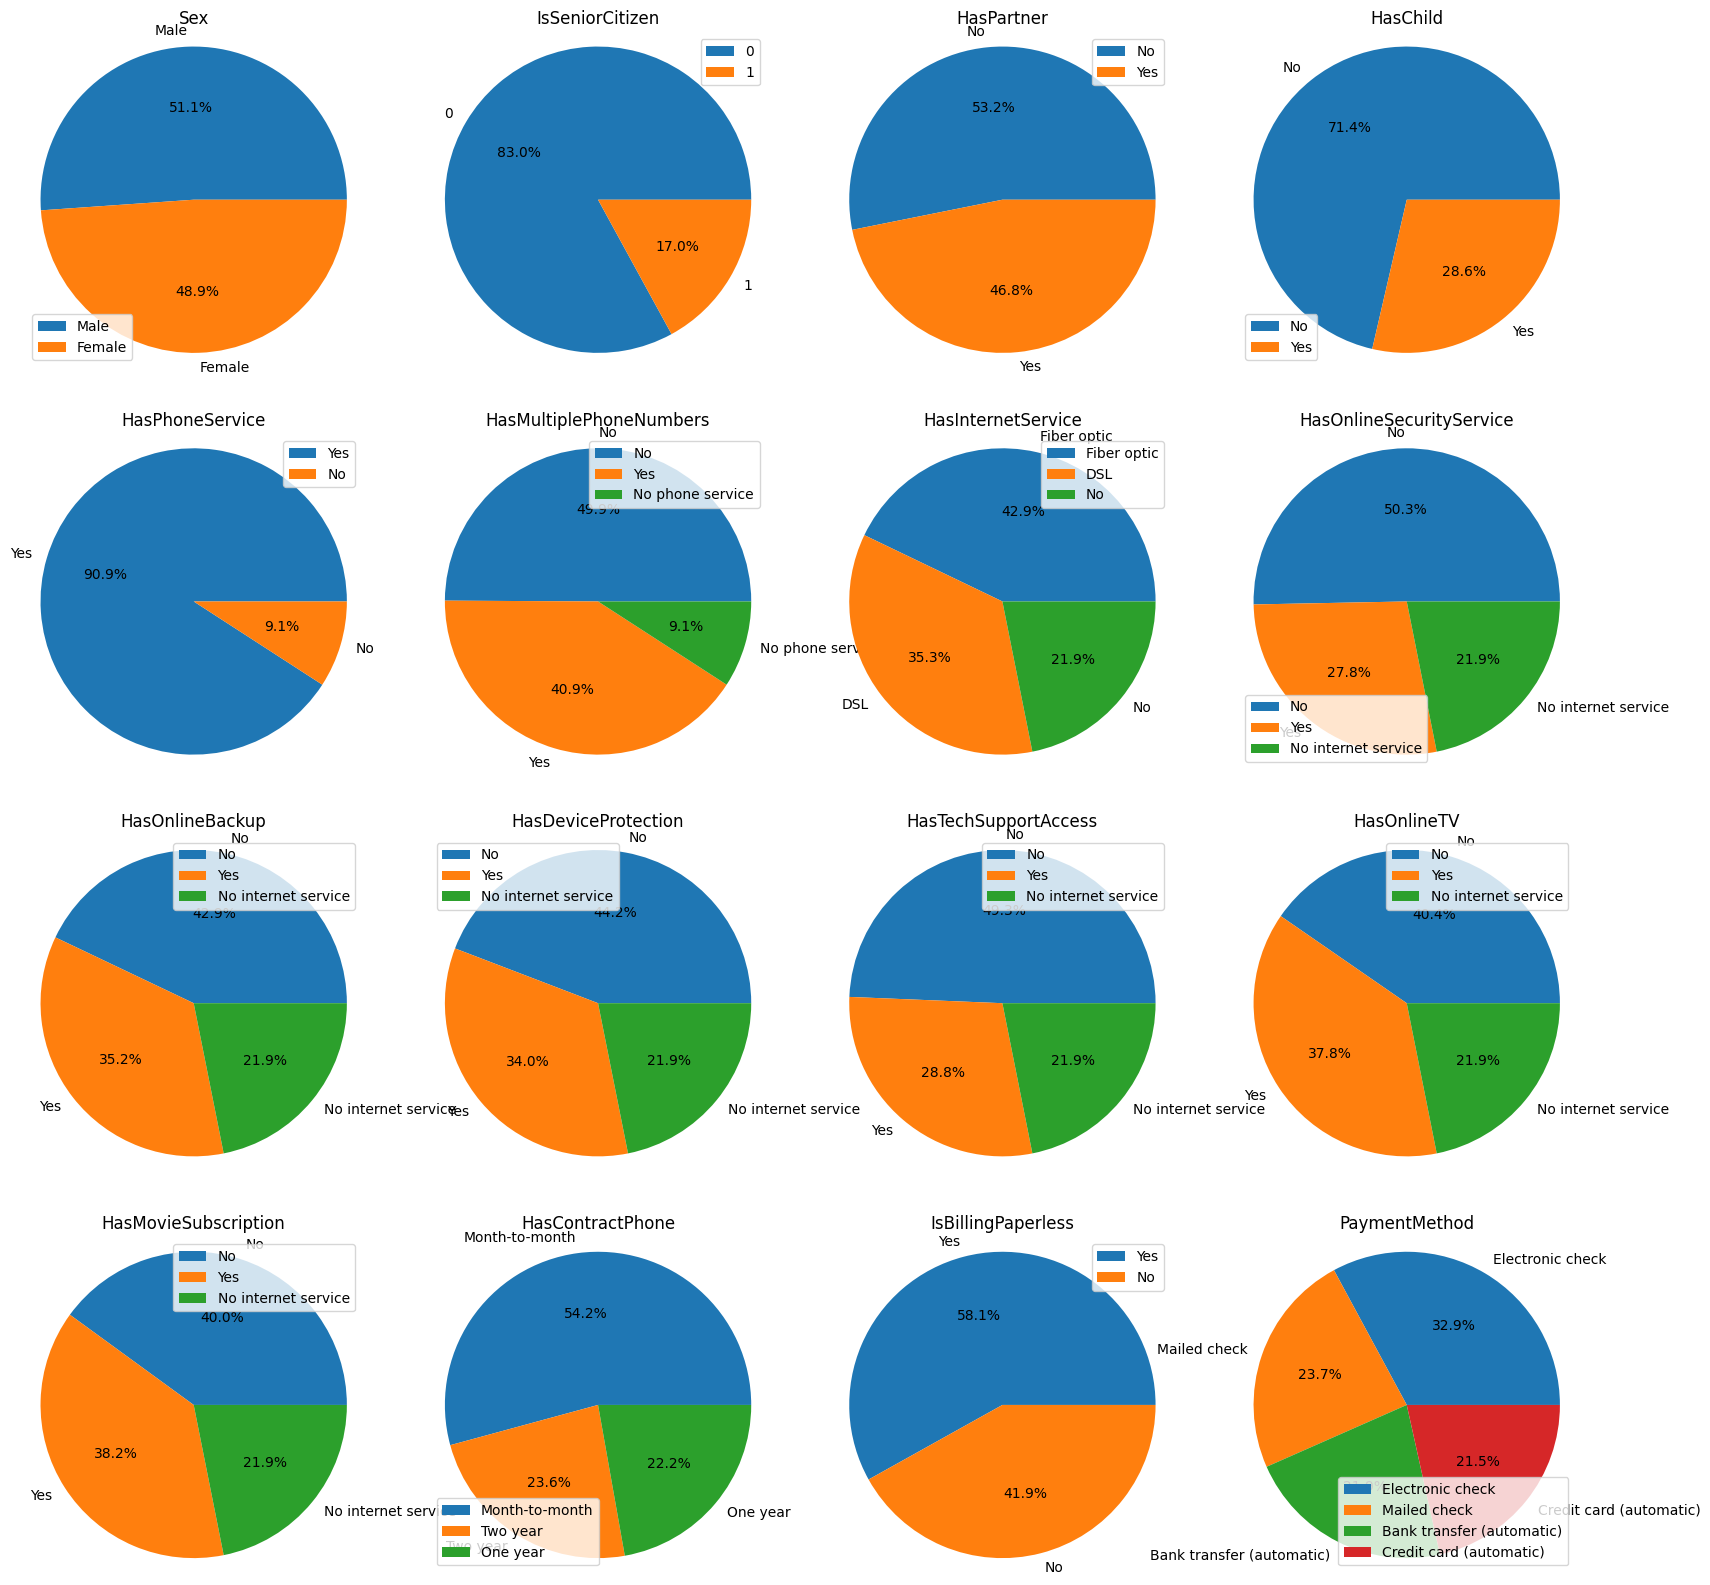

In [ ]:
plt.figure(figsize=(20, 20))
for i in range(1, len(cat_cols) + 1):
    plt.subplot(4, 4, i)
    plt.pie(data_test[cat_cols[i - 1]].value_counts(), labels=data_test[cat_cols[i - 1]].value_counts().index.tolist(), autopct='%1.1f%%')
    plt.axis('equal')
    plt.title(cat_cols[i - 1])
    plt.legend()
plt.show()

Построим попарные графики для всех признаков:

In [ ]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

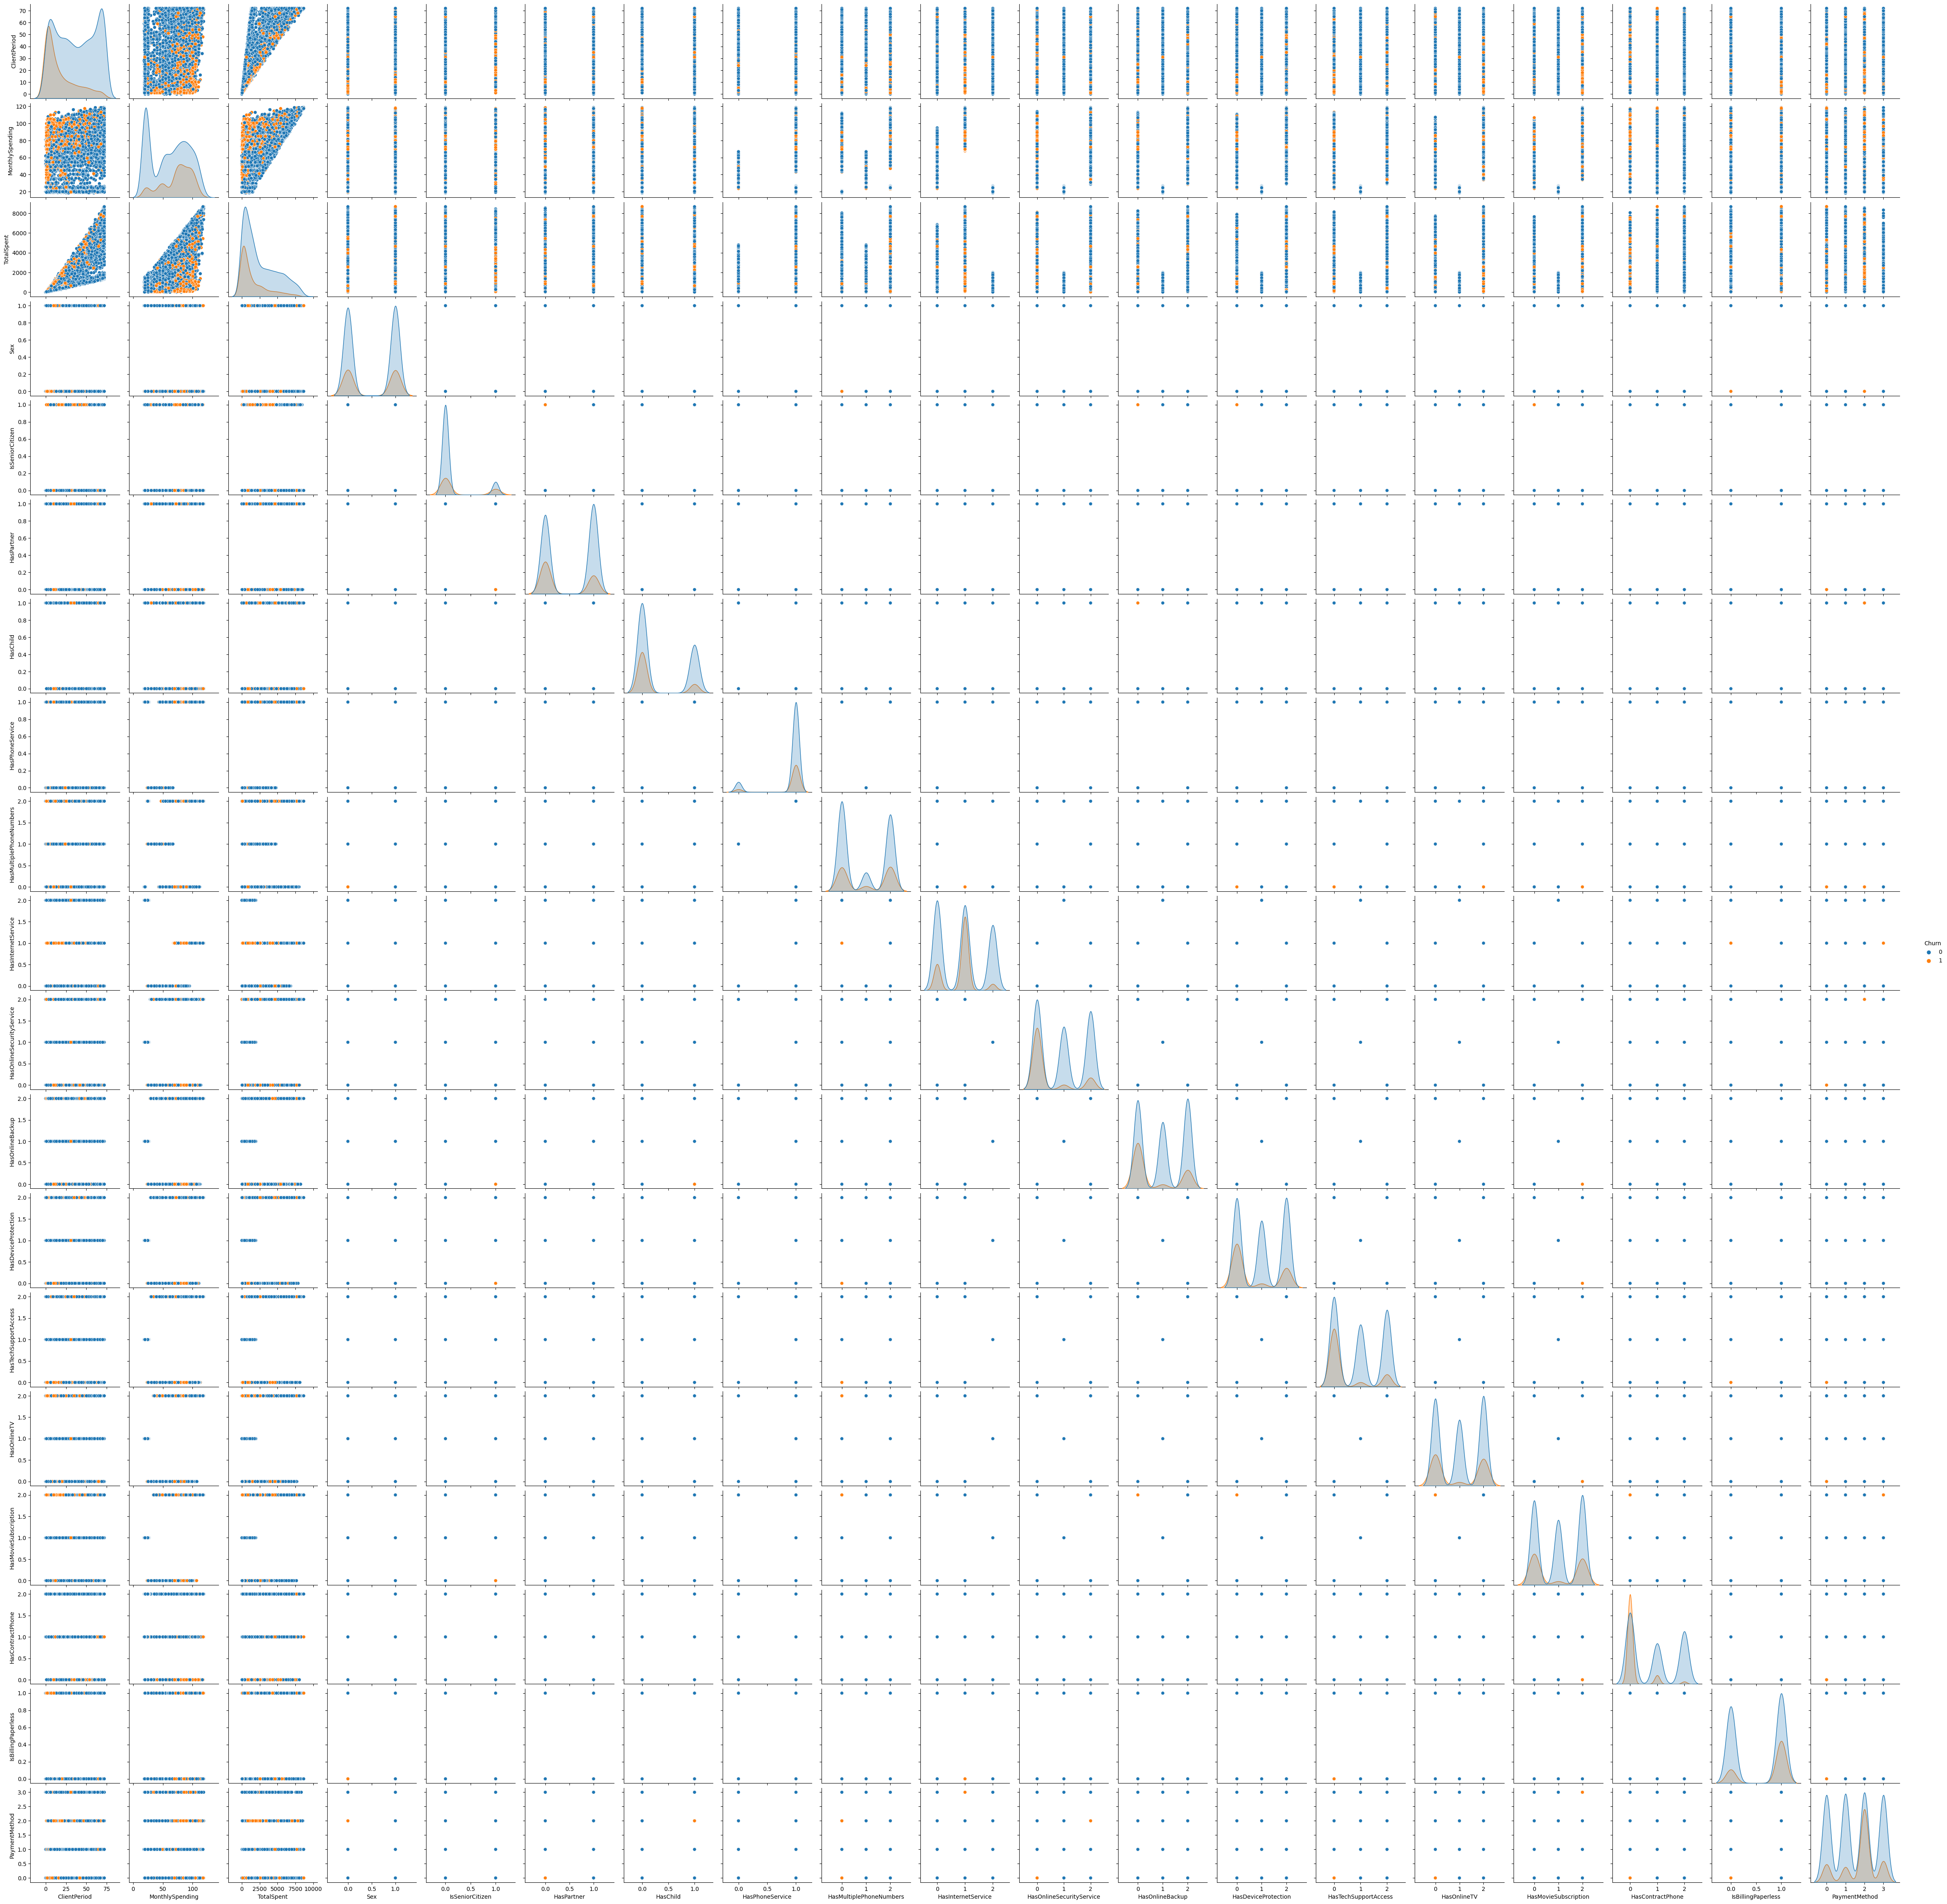

In [ ]:
le = LabelEncoder()
le_data = data_train.copy(deep=True)
for item in cat_cols:
    le_data[item] = le.fit_transform(le_data[item])
sns.pairplot(le_data, hue=target_col)
plt.show()

In [ ]:
le_data.head()

ClientPeriod  MonthlySpending   TotalSpent  Sex  IsSeniorCitizen  \
0            55            19.50  1026.349976    1                0   
1            72            25.85  1872.199951    1                0   
2             1            75.90    75.900002    1                0   
3            32            79.30  2570.000000    0                1   
4            60           115.25  6758.450195    0                0   

   HasPartner  HasChild  HasPhoneService  HasMultiplePhoneNumbers  \
0           1         1                1                        0   
1           1         0                1                        2   
2           0         0                1                        0   
3           1         0                1                        2   
4           1         1                1                        2   

   HasInternetService  HasOnlineSecurityService  HasOnlineBackup  \
0                   2                         1                1   
1                   2                         1                1   
2                   1                         0                0   
3                   1                         0                0   
4                   1                         2                2   

   HasDeviceProtection  HasTechSupportAccess  HasOnlineTV  \
0                    1                     1            1   
1                    1                     1            1   
2                    0                     2            0   
3                    2                     0            0   
4                    2                     2            2   

   HasMovieSubscription  HasContractPhone  IsBillingPaperless  PaymentMethod  \
0                     1                 1                   0              3   
1                     1                 2                   0              1   
2                     0                 0                   1              2   
3                     0                 0                   0              3   
4                     2                 2                   0              1   

   Churn  
0      0  
1      0  
2      1  
3      0  
4      0

Можно заметить, что числовые признаки и их пары довольно неплохо определяют кластер оттока пользователей. Также есть категориальные фичи, которые являются сильными классификаторами, например, HasChild, HasInternetService, HasOnlineSecurityService, HasTechSupportAccess, HasContractPhone, PaymentMethod и некоторые другие. В то же время, фича Sex выглядит довольно бесполезной, похоже, что ее вообще можно убрать без потери качества модели. В целом картина выглядит обнадеживающе, похоже, что по этим данным что-то должно наобучаться.

## Подготовка данных и выбор обучающей модели

Выделим матрицу признаков и целевую переменную для тренировочной выборки и матрицу признаков - для тестовой:

In [ ]:
X_train = data_train.iloc[:, :-1]
y_train = data_train.iloc[:, -1]
X_test = data_test.iloc[:, :]

### Логистическая регрессия

Для начала применим логистическую регрессию. Создадим Pipeline для нашей задачи и оптимизируем параметр "C" при помощи GridSearch. Оценку качества модели будем проводить по метрике 'ROC-AUC' с использованием Cross Validation на 5 фолдах.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [ ]:
pipe = Pipeline(steps=[
    ('preprocessing', FeatureUnion(transformer_list=[
        ('categorical', Pipeline(steps=[
            ('select', FunctionTransformer(lambda data: data[cat_cols])),
            ('one_hot_encoding', OneHotEncoder())
        ])),

        ('numeric', Pipeline(steps=[
            ('select', FunctionTransformer(lambda data: data[num_cols])),
            ('scale', StandardScaler())
        ]))
    ])),
    ('estimator', LogisticRegression(max_iter=10000))
    ]
)

In [ ]:
parameters = [{'estimator__C': [100, 10, 1, 0.1, 0.01, 0.001]}]

LR_grid_search = GridSearchCV(
    pipe,
    param_grid=parameters,
    cv=5,
    scoring='roc_auc',
    refit=True,
    verbose=False
)

In [ ]:
LR_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        FeatureUnion(transformer_list=[('categorical',
                                                                        Pipeline(steps=[('select',
                                                                                         FunctionTransformer(func=<function <lambda> at 0x7baf41114a60>)),
                                                                                        ('one_hot_encoding',
                                                                                         OneHotEncoder())])),
                                                                       ('numeric',
                                                                        Pipeline(steps=[('select',
                                                                                         FunctionTransformer(func=<function <lambda> at 0x7baf41114af0>)),
                                                                                        ('scale',
                                                                                         StandardScaler())]))])),
                                       ('estimator',
                                        LogisticRegression(max_iter=10000))]),
             param_grid=[{'estimator__C': [100, 10, 1, 0.1, 0.01, 0.001]}],
             scoring='roc_auc', verbose=False)

Посмотрим на качество обучения и оптимальное значение параметра 'C':

In [ ]:
LR_score = LR_grid_search.best_score_
LR_score

0.8451148504343466

In [ ]:
C_opt = LR_grid_search.best_params_
C_opt

{'estimator__C': 100}

In [ ]:
y_train_predicted_LR = LR_grid_search.predict_proba(X_train)[:, 1]
y_test_predicted_LR = LR_grid_search.predict_proba(X_test)[:, 1]

In [ ]:
roc_auc_score(y_train, y_train_predicted_LR)

0.8490560039682422

Построим ROC-кривую для train:

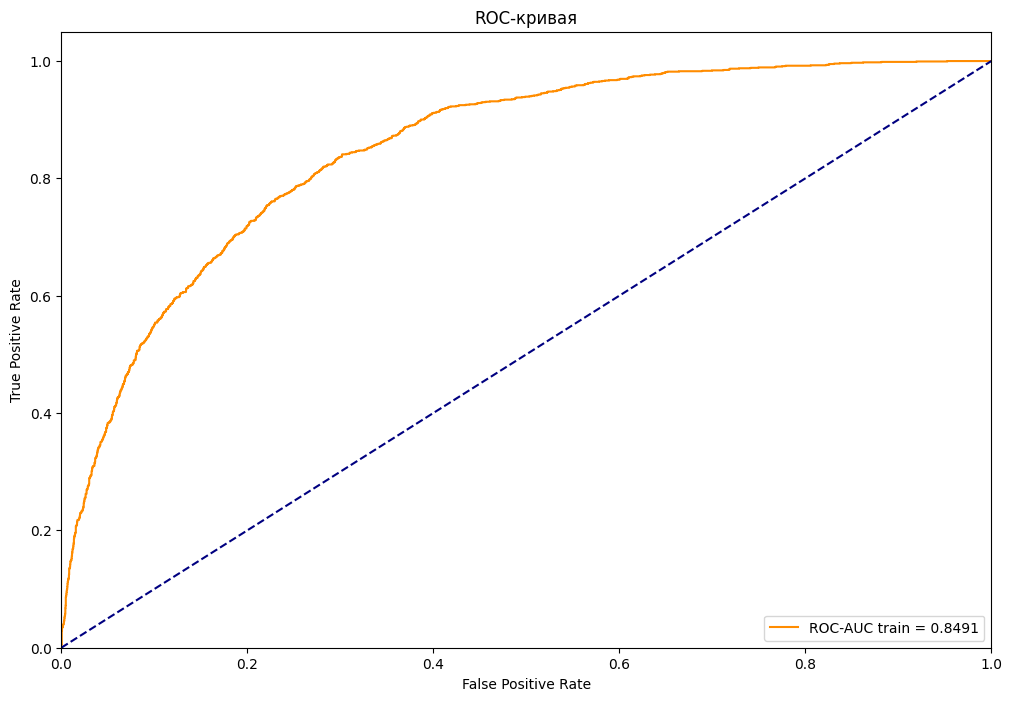

In [ ]:
fpr, tpr, threshold = roc_curve(y_train, y_train_predicted_LR)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, color='darkorange', label='ROC-AUC train = %0.4f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()

Сохраним результаты в файл:

In [ ]:
# submission = pd.read_csv(
#     'https://raw.githubusercontent.com/houlden/Kaggle_DLS/main/submission.csv',
#     index_col='Id'
# )
# submission['Churn'] = y_test_predicted_LR
# submission.to_csv('my_submission_LR.csv')

### Градиентный бустинг на решающих деревьях

![](https://github.com/houlden/Kaggle_DLS/blob/main/GB%20and%20GS.jpg?raw=true)

In [ ]:
# !pip install catboost
# !pip install ipywidgets
# !pip install shap
# !jupyter nbextension enable --py widgetsnbextension

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.7 MB/s eta 0:00:00


In [ ]:
import catboost

#### Catboost + GridSearch

In [ ]:
cat_boost_clf1 = catboost.CatBoostClassifier(
    cat_features=list(range(3, 19)),
    loss_function='Logloss',
    random_seed=42,
    eval_metric='AUC',
    early_stopping_rounds=30,
    verbose=False
)

params_grid = {}
params_grid['n_estimators'] = [200]
# params_grid['learning_rate'] = list(np.arange(0.01, 0.1, 0.01))
# params_grid['depth'] = [4, 5, 6, 7]
# params_grid['l2_leaf_reg'] = np.linspace(0, 10, 20)

cat_boost_grid = cat_boost_clf1.grid_search(
    params_grid,
    X_train,
    y_train,
    cv=5,
    partition_random_seed=0,
    search_by_train_test_split=False,
    refit=True,
    shuffle=True,
    stratified=True,
    verbose=False,
    plot=False
)

Training on fold [0/5]

bestTest = 0.8510830325
bestIteration = 117

Training on fold [1/5]

bestTest = 0.8575164306
bestIteration = 127

Training on fold [2/5]

bestTest = 0.8485096732
bestIteration = 179

Training on fold [3/5]

bestTest = 0.8403349661
bestIteration = 130

Training on fold [4/5]

bestTest = 0.8410355156
bestIteration = 181

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.


In [ ]:
y_train_predicted_GB1 = cat_boost_clf1.predict_proba(X_train)[:, 1]
y_test_predicted_GB1 = cat_boost_clf1.predict_proba(X_test)[:, 1]

In [ ]:
roc_auc_score(y_train, y_train_predicted_GB1)

0.8861540081322274

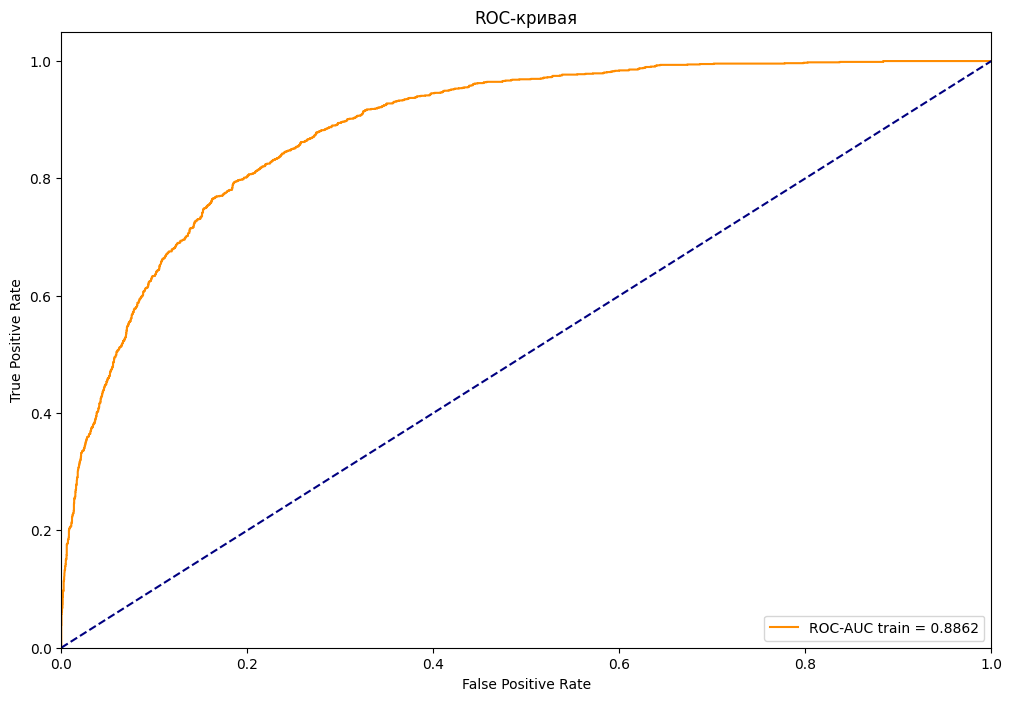

In [ ]:
fpr, tpr, threshold = roc_curve(y_train, y_train_predicted_GB1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, color='darkorange', label='ROC-AUC train = %0.4f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()

In [ ]:
cat_boost_clf1.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'AUC',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'iterations': 200,
 'sampling_frequency': 'PerTree',
 'fold_permutation_block': 0,
 'leaf_estimation_method': 'Newton',
 'od_pval': 0,
 'random_score_type': 'NormalWithModelSizeDecrease',
 'counter_calc_method': 'SkipTest',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'ctr_leaf_count_limit': 18446744073709551615,
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'eval_fraction': 0,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'od_type': 'Iter',
 'rsm': 1,
 'boost_from_average': False,
 'max_ctr_complexity': 4,
 'model_size_reg': 0.5,
 'simple_ctr': ['Borde

In [ ]:
# submission = pd.read_csv(
#     'https://raw.githubusercontent.com/houlden/Kaggle_DLS/main/submission.csv',
#     index_col='Id'
# )
# submission['Churn'] = y_test_predicted_GB1
# submission.to_csv('my_submission_GB.csv')

#### Catboost + RandomizedSearch

In [ ]:
cat_boost_clf2 = catboost.CatBoostClassifier(
    cat_features=list(range(3, 19)),
    loss_function='Logloss',
    random_seed=42,
    eval_metric='AUC',
    early_stopping_rounds=20,
    verbose=False
)

params_random = {}
params_random['n_estimators'] = list(range(15, 401, 5))
params_random['learning_rate'] = list(np.arange(0.01, 0.1, 0.01))
params_random['depth'] = [4, 5, 6, 7]
params_random['l2_leaf_reg'] = [0.1, 1, 3, 5, 7, 10]

cat_boost_randomized_search = cat_boost_clf2.randomized_search(
    params_random,
    X_train,
    y_train,
    cv=5,
    n_iter=500,
    partition_random_seed=0,
    search_by_train_test_split=False,
    refit=True,
    shuffle=True,
    stratified=True,
    verbose=False
)

Выходные данные были обрезаны до нескольких последних строк (5000).
bestIteration = 63

Training on fold [4/5]

bestTest = 0.8408517981
bestIteration = 116

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
Training on fold [0/5]

bestTest = 0.8510830325
bestIteration = 117

Training on fold [1/5]

bestTest = 0.8575164306
bestIteration = 127

Training on fold [2/5]

bestTest = 0.8485096732
bestIteration = 179

Training on fold [3/5]

bestTest = 0.8403349661
bestIteration = 130

Training on fold [4/5]

bestTest = 0.8405518037
bestIteration = 135

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
Training on fold [0/5]

bestTest = 0.8513977599
bestIteration = 52

Training on fold [1/5]

bestTest = 0.8568522633
bestIteration = 73

Training on fold [2/5]

bestTest = 0.8487457188
bestIteration = 122

Training on fold [3/5]

b

In [ ]:
y_train_predicted_GB2 = cat_boost_clf2.predict_proba(X_train)[:, 1]
y_test_predicted_GB2 = cat_boost_clf2.predict_proba(X_test)[:, 1]

In [ ]:
roc_auc_score(y_train, y_train_predicted_GB2)

0.8668572070455577

In [ ]:
cat_boost_clf2.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'AUC',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'iterations': 390,
 'sampling_frequency': 'PerTree',
 'fold_permutation_block': 0,
 'leaf_estimation_method': 'Newton',
 'od_pval': 0,
 'random_score_type': 'NormalWithModelSizeDecrease',
 'counter_calc_method': 'SkipTest',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'ctr_leaf_count_limit': 18446744073709551615,
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'eval_fraction': 0,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 5,
 'random_strength': 1,
 'od_type': 'Iter',
 'rsm': 1,
 'boost_from_average': False,
 'max_ctr_complexity': 4,
 'model_size_reg': 0.5,
 'simple_ctr': ['Borde

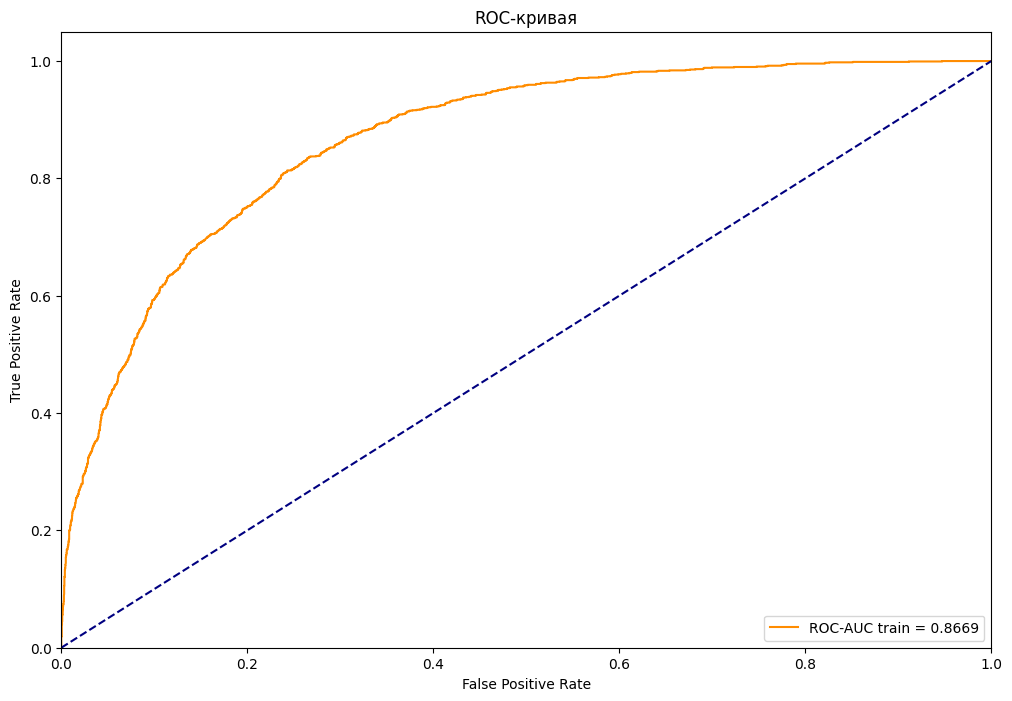

In [ ]:
fpr, tpr, threshold = roc_curve(y_train, y_train_predicted_GB2)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, color='darkorange', label='ROC-AUC train = %0.4f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# submission = pd.read_csv(
#     'https://raw.githubusercontent.com/houlden/Kaggle_DLS/main/submission.csv',
#     index_col='Id'
# )
# submission['Churn'] = y_test_predicted_GB2
# submission.to_csv('my_submission_GB.csv')

### Случайный лес

Подготовим данные (отнормируем и применим one-hot-encoding):

In [ ]:
numeric_X_train = X_train[num_cols]
numeric_X_test = X_test[num_cols]

categorical_X_train = X_train[cat_cols]
categorical_X_test = X_test[cat_cols]

scaler = StandardScaler()

numeric_X_train = pd.DataFrame(data=scaler.fit_transform(numeric_X_train), columns=num_cols, index=categorical_X_train.index.tolist())
numeric_X_test = pd.DataFrame(data=scaler.transform(numeric_X_test), columns=num_cols, index=categorical_X_test.index.tolist())

dummy_features_train = pd.get_dummies(categorical_X_train)
dummy_features_test = pd.get_dummies(categorical_X_test)

X_train_prep = pd.concat([numeric_X_train, dummy_features_train], axis=1)
y_train_prep = data_train[target_col]
X_test_prep = pd.concat([numeric_X_test, dummy_features_test], axis=1)

X_train_prep = X_train_prep.values
y_train_prep = y_train_prep.values
X_test_prep = X_test_prep.values

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.model_selection import KFold
from tqdm.notebook import tqdm

In [ ]:
max_trees = 110

values = np.arange(max_trees) + 1

kf = KFold(n_splits=5, shuffle=True, random_state=0)

global_scores = []

for train_indices, val_indices in tqdm(kf.split(X_train_prep), total=5):
    scores = []

    X_train_kf = X_train_prep[train_indices]
    y_train_kf = y_train_prep[train_indices]

    X_val_kf = X_train_prep[val_indices]
    y_val_kf = y_train_prep[val_indices]

    forest = RandomForestClassifier(n_estimators=max_trees, random_state=0)
    forest.fit(X_train_kf, y_train_kf)
    trees = forest.estimators_

    for number_of_trees in tqdm(values, leave=False):
        thinned_forest = RandomForestClassifier(n_estimators=number_of_trees)

        thinned_forest.n_classes_ = 2
        thinned_forest.estimators_ = trees[:number_of_trees]

        scores.append(roc_auc_score(y_val_kf, thinned_forest.predict_proba(X_val_kf)[:, 1]))

    scores = np.array(scores)

    global_scores.append(scores)

global_scores = np.stack(global_scores, axis=0)

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/110 [00:00<?, ?it/s]

  0%|          | 0/110 [00:00<?, ?it/s]

  0%|          | 0/110 [00:00<?, ?it/s]

  0%|          | 0/110 [00:00<?, ?it/s]

  0%|          | 0/110 [00:00<?, ?it/s]

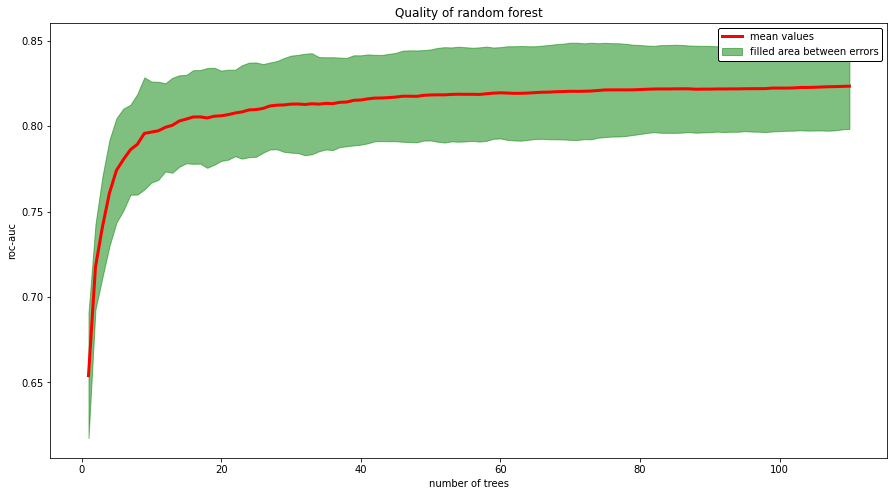

In [ ]:
mean_cross_val_score = global_scores.mean(axis=0)
std_cross_val_score = global_scores.std(axis=0)

plt.figure(figsize=(15,8))
plt.title('Quality of random forest')

plt.plot(values, mean_cross_val_score, label='mean values', color='red', lw=3)
plt.fill_between(values,
                 mean_cross_val_score - 2 * std_cross_val_score,
                 mean_cross_val_score + 2 * std_cross_val_score,
                 color='green',
                 label='filled area between errors',
                 alpha=0.5)
legend_box = plt.legend(framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.xlabel('number of trees')
plt.ylabel('roc-auc')

plt.show()

In [ ]:
y_train_predicted_forest = forest.predict_proba(X_train_prep)[:, 1]
y_test_predicted_forest = forest.predict_proba(X_test_prep)[:, 1]

In [ ]:
roc_auc_score(y_train, y_train_predicted_forest)

0.9768303237735553

In [ ]:
# submission = pd.read_csv(
#     'https://raw.githubusercontent.com/houlden/Kaggle_DLS/main/submission.csv',
#     index_col='Id'
# )
# submission['Churn'] = y_test_predicted_forest
# submission.to_csv('my_submission_randomForest.csv')

Стандартный catboost без оптимизации сразу выдал score = 0.85345 (n_estimators=200). Дальше я поигрался с бустингом - оптимизировал двумя способами (grid search и randomized search). Эти два способа - по сути одно и то же, просто randomized удобнее и с ним вообще не нужно думать насчет количества значений в диапазоне. Он использует генератор псевдослучайных чисел и, сколько бы точек не было указано, он сгенерирует их из заданных диапазонов так, чтобы N-мерный куб параметров заполнялся равномерно. Понятно, что магии тут нет, и, если мы укажем кучу параметров для оптимизации, кучу значений у каждого, то и каждый отдельный интервал будет разбит на небольшое количество участков (т.н. "проклятие размерности"), а если всего вариантов перебора немного, то и интервал значений для отдельного параметра мы переберем с мелким шагом. Я пробовал оптимизировать много параметров сразу, пробовал отдельно оптимизировать 1-2 наиболее важных параметра с мелким шагом - особого толку не было. Были изменения до 4% на кросс-валидации, несколько раз заливал результаты на Kaggle и они все были чуть хуже стандартного. Если бы test-сет был в файле, то можно было бы еще отжать несколько процентов, но каждый раз заливать на Kaggle мне стало лень:) По ощущениям, оптимизировать learning_rate конкретно в данном случае большого смысла нет, catboost сам его оптимизирует и такие модели у меня получались лучше.

### Стекинг

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
def compute_meta_feature(model, X_train, X_test, y_train, cv):
    try:
        train_answers = cross_val_predict(model, X_train, y_train, cv=cv, method='predict_proba')[:, 1]
        model.fit(X_train, y_train)
        return train_answers, model.predict_proba(X_test)[:, 1]

    except Exception:
        train_answers = cross_val_predict(model, X_train, y_train, cv=cv, method='predict')[:, 1]
        model.fit(X_train, y_train)
        return train_answers, model.predict(X_test)[:, 1]

In [ ]:
models = []
models.append(KNeighborsClassifier(n_jobs=-1, n_neighbors=18))
models.append(LogisticRegression(max_iter=1000, random_state=0))
models.append(RandomForestClassifier(max_depth=3, n_estimators=50, n_jobs=-1, random_state=1))
models.append(RandomForestClassifier(max_depth=4, n_estimators=50, n_jobs=-1, random_state=2))
models.append(RandomForestClassifier(max_depth=5, n_estimators=70, n_jobs=-1, random_state=3))
models.append(RandomForestClassifier(max_depth=6, n_estimators=70, n_jobs=-1, random_state=4))
models.append(RandomForestClassifier(max_depth=6, n_estimators=70, n_jobs=-1, random_state=5))
models.append(RandomForestClassifier(max_depth=6, n_estimators=70, n_jobs=-1, random_state=6))
models.append(RandomForestClassifier(max_depth=7, n_estimators=20, n_jobs=-1, random_state=7))
models.append(DecisionTreeClassifier(max_depth=8, random_state=8))

In [ ]:
meta_features_train = np.zeros((X_train.shape[0], 0))
meta_features_test = np.zeros((X_test.shape[0], 0))

In [ ]:
for model in tqdm(models):
    train, test = compute_meta_feature(model, X_train_prep, X_test_prep, y_train_prep, 5)
    meta_features_train = np.append(meta_features_train, train.reshape((train.size, 1)), axis=1)
    meta_features_test = np.append(meta_features_test, test.reshape((test.size, 1)), axis=1)

  0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
stacking_model = LogisticRegression(max_iter=1000, random_state=0)
stacking_model.fit(meta_features_train, y_train)

y_train_predicted_stacking = stacking_model.predict_proba(meta_features_train)[:, 1]
y_test_predicted_stacking = stacking_model.predict_proba(meta_features_test)[:, 1]

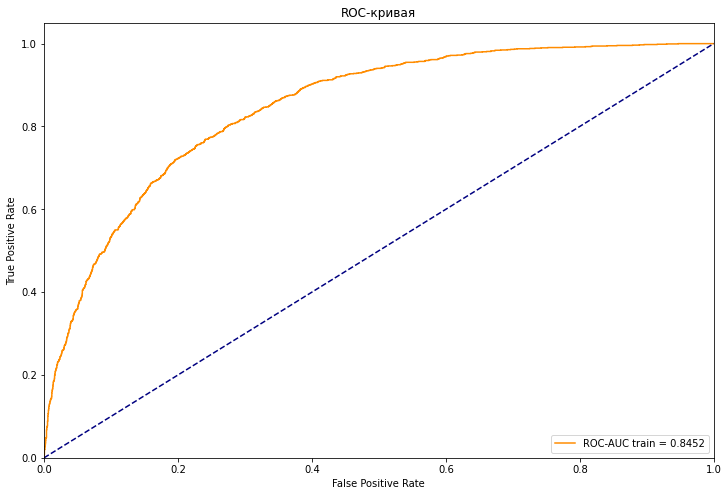

In [ ]:
fpr, tpr, threshold = roc_curve(y_train, y_train_predicted_stacking)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, color='darkorange', label='ROC-AUC train = %0.4f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# submission = pd.read_csv(
#     'https://raw.githubusercontent.com/houlden/Kaggle_DLS/main/submission.csv',
#     index_col='Id'
# )
# submission['Churn'] = y_test_predicted_stacking
# submission.to_csv('my_submission_stacking.csv')

Ну и как же тут не постакать catboost-ы :) Возьмем результаты работы моделей из списка models, добавим к ним результаты двух catboost-ов и оптимизированной логистической регрессии (также можно добавить к этим мета-признакам наши обычные признаки) и засунем в, конечно же, оптимизированную логистическую регрессию.

![](https://github.com/houlden/Kaggle_DLS/blob/main/stacking.jpg?raw=true)

In [ ]:
y_train_GB1 = y_train_predicted_GB1.reshape(X_train_prep.shape[0], 1)
y_test_GB1 = y_test_predicted_GB1.reshape(X_test_prep.shape[0], 1)
y_train_GB2 = y_train_predicted_GB2.reshape(X_train_prep.shape[0], 1)
y_test_GB2 = y_test_predicted_GB2.reshape(X_test_prep.shape[0], 1)
y_train_LR = y_train_predicted_LR.reshape(X_train_prep.shape[0], 1)
y_test_LR = y_test_predicted_LR.reshape(X_test_prep.shape[0], 1)
y_train_forest = y_train_predicted_forest.reshape(X_train_prep.shape[0], 1)
y_test_forest = y_test_predicted_forest.reshape(X_test_prep.shape[0], 1)

In [ ]:
# Со стандартными признаками:
X_train_meta = np.hstack((X_train_prep, meta_features_train, y_train_GB1, y_train_GB2, y_train_LR, y_train_forest))
X_test_meta = np.hstack((X_test_prep, meta_features_test, y_test_GB1, y_test_GB2, y_test_LR, y_test_forest))

# Только по результатам предсказания более простых моделей:
# X_train_meta = np.hstack((meta_features_train, y_train_GB1, y_train_GB2, y_train_LR, y_train_forest))
# X_test_meta = np.hstack((meta_features_test, y_test_GB1, y_test_GB2, y_test_LR, y_test_forest))

In [ ]:
parameters = [{'C': list(np.linspace(0.1, 100, 50))}]

stacking_metaModel = GridSearchCV(
    LogisticRegression(max_iter=1000, random_state=0),
    param_grid=parameters,
    cv=5,
    scoring='roc_auc',
    refit=True,
    verbose=False
)

stacking_metaModel.fit(X_train_meta, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.1, 2.138775510204082, 4.1...
                                30.68163265306123, 32.72040816326531,
                                34.759183673469394, 36.79795918367348,
                                38.83673469387756, 40.87551020408164,
                                42.91428571428572, 44.9530612244898,
           

In [ ]:
stacking_metaModel.best_params_

{'C': 95.92244897959185}

In [ ]:
y_train_predicted_stacking_meta = stacking_metaModel.predict_proba(X_train_meta)[:, 1]
y_test_predicted_stacking_meta = stacking_metaModel.predict_proba(X_test_meta)[:, 1]

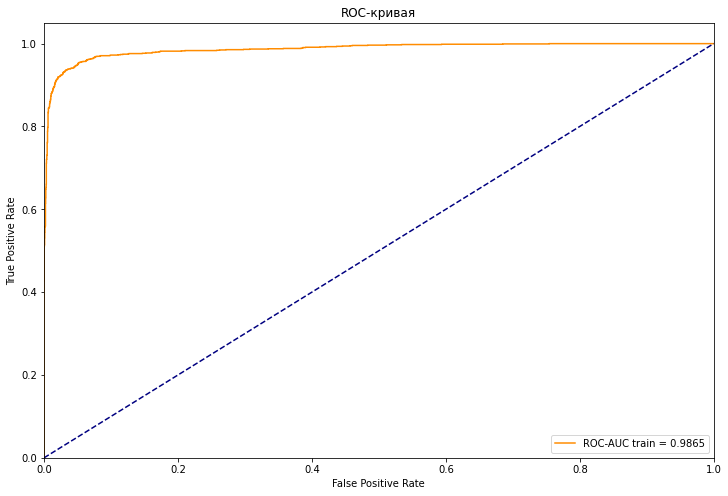

In [ ]:
fpr, tpr, threshold = roc_curve(y_train, y_train_predicted_stacking_meta)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, color='darkorange', label='ROC-AUC train = %0.4f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# submission = pd.read_csv(
#     'https://raw.githubusercontent.com/houlden/Kaggle_DLS/main/submission.csv',
#     index_col='Id'
# )
# submission['Churn'] = y_test_predicted_stacking_meta
# submission.to_csv('my_submission_stacking_meta.csv')

## Заключение

In [ ]:
best_model = y_test_predicted_GB1

В общем, я пробовал оптимизировать catboost-ы, пробовал ансамбли моделей, пробовал мета-модель над катбустами, логистической регрессией, случайными лесами, KNN и решающими деревьями (с применением изначальных признаков и без, с ними получилось лучше), но победил catboost с дефолтными параметрами, который получился с первой попытки. Если интересно, то лучший результат стекингом - 0.84903 на test. Уверен, что можно лучше, я не сильно старался - попыток на 15-20 минут. Логистическая регрессия - 0.84592.

Варианты, что еще можно сделать для улучшения результата только обозначенными тут алгоритмами:

- первое и самое главное - поработать с данными, можно попробовать какие-то признаки выкинуть, а какие-то оставить, некоторые из них имеют более высокое влияние на целевую переменную (являются сильными классификаторами), подумать над введением еще каких-то признаков;
- попробовать поиграть со стекингом, там поле непаханное, я его сделал просто ради интереса (можно потрогать первичные модели - добавить бустинги на деревьях небольшой глубины, поменять параметры лесов и т.д.);
- можно посерьезнее оптимизировать градиентный бустинг; еще могли немного помочь ipywidgets для отрисовки процесса randomized search, но сходу у меня почему-то не получилось их запустить (раньше колаб их вроде бы не поддерживал, но в семинарском видео все работало);
- возможно следовало при помощи стратификации (с сохранением соотношения 0 и 1) оторвать кусочек данных от train и использовать его как test, чтобы проверять после валидации, чтобы каждый раз не обращаться к Kaggle.

Делать это я, конечно же не буду:)